<a href="https://colab.research.google.com/github/hongrolee/Machine-Learning/blob/main/colab/%EC%A0%9C%ED%92%88_%EB%AC%B4%EA%B2%8C_%EC%98%88%EC%B8%A1_K_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%ED%9A%8C%EA%B7%80_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-최근접 이웃 회귀 알고리즘

## 제품의 무게 예측해보기

### 제품의 가로, 두께 생성하기

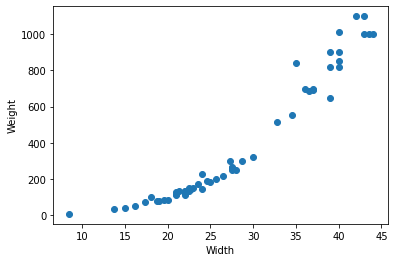

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

product_width = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
product_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

plt.scatter(product_width, product_weight)
plt.xlabel('Width')
plt.ylabel('Weight')
plt.show()


### 사이킷런을 이용하여 훈련 및 테스트 데이터 생성하기

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_answer, test_answer = train_test_split(product_width, product_weight, random_state=42)

train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

print(train_data.shape, test_data.shape)


(42, 1) (14, 1)


### k-최근접 이웃 회귀 알고리즘을 적용하여 학습하기(모델생성)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.n_neighbors = 3
knr.fit(train_data, train_answer)
knr.score(test_data, test_answer)

0.9746459963987609

### 정답과 예측의 오차 계산하기

In [ ]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_data)

mae = mean_absolute_error(test_answer, test_prediction)
print(mae)

35.42380952380951


### 훈련세트로 모델 평가해보기 (과대적합 및 과소적합 분석)

In [ ]:
print(knr.score(train_data, train_answer))
print(knr.score(test_data, test_answer))

0.9804899950518966
0.9746459963987609


### Width 50cm를 넣어 무게 예측해보기

In [ ]:
print(knr.predict([[50]]))

[1033.33333333]


### 50cm 제품의 최근접 이웃들을 산점도에 표시하기

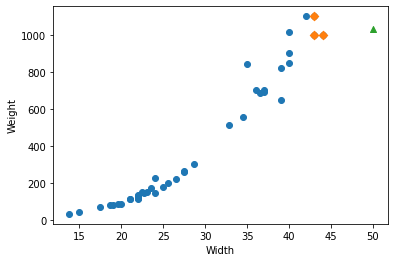

In [ ]:
 import matplotlib.pyplot as plt

 distances, indexes = knr.kneighbors([[50]])

 plt.scatter(train_data, train_answer)
 plt.scatter(train_data[indexes], train_answer[indexes], marker='D')

 plt.scatter(50, 1033, marker='^')
 plt.xlabel('Width')
 plt.ylabel('Weight')
 plt.show()